<a href="https://colab.research.google.com/github/ROKR7381/DEMO_PURPOSE/blob/main/Bank_Original_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**---------------------------BANKING PROJECT------------------**
**-------------------Analysis by ROSHAN KUMAR----------------**

**The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.**

In [1]:
# importing necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-full.csv',sep = ';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
print('number of rows and columns = ',df.shape)

number of rows and columns =  (45211, 17)


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


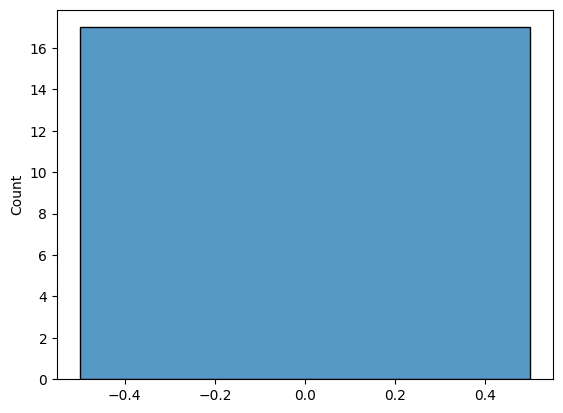

In [4]:
#finding missing
print(df.isnull().sum())
sns.histplot(df.isnull().sum());

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


As observed above balance ,duration, pdays, previous has sudden jump in the value from 75% to 100% which shows some anamolies.

In [6]:
#checking datatype
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

**DATA PREPROCESSING**

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64


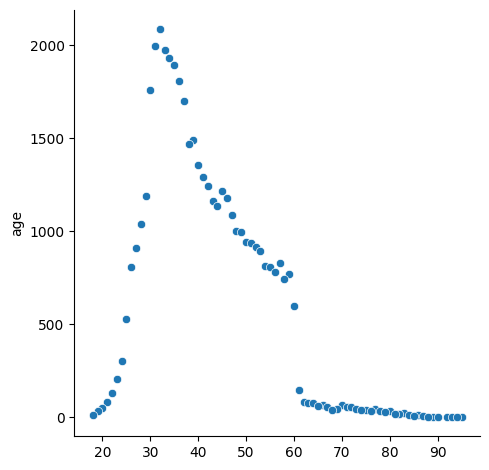

In [8]:
sns.relplot(df.age.value_counts())
print(df.age.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


<Axes: >

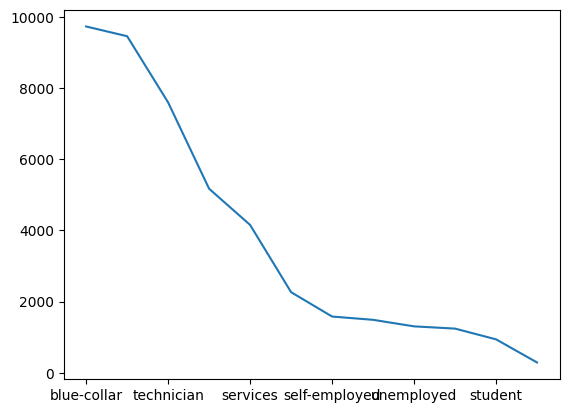

In [9]:
print(df.job.value_counts())
df.job.value_counts().plot()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


<Axes: xlabel='marital', ylabel='Count'>

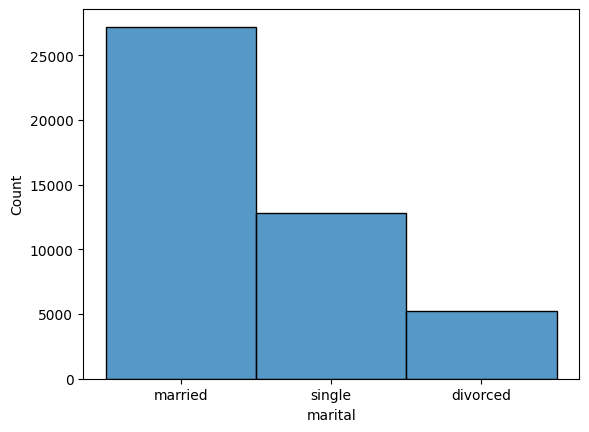

In [10]:
print(df.marital.value_counts())
sns.histplot(df['marital'],)

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


<Axes: xlabel='education', ylabel='Count'>

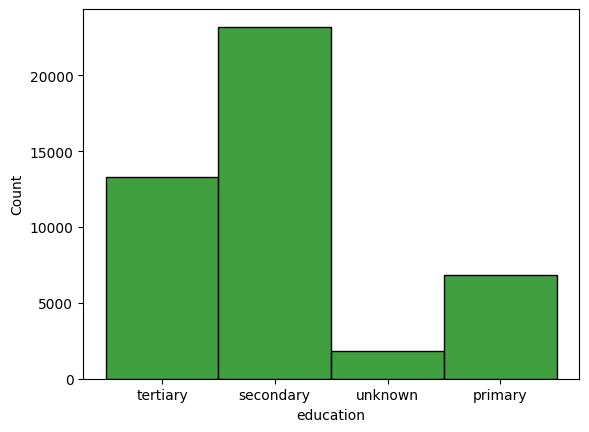

In [11]:
print(df.education.value_counts())
sns.histplot(df['education'],color = 'green')

yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64


<Axes: xlabel='loan', ylabel='Count'>

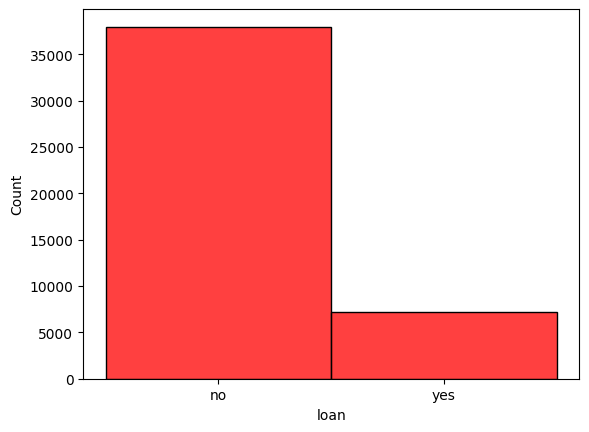

In [12]:
print(df.housing.value_counts())
print(df.loan.value_counts())
sns.histplot(df['loan'],color = 'red')

<Axes: ylabel='campaign'>

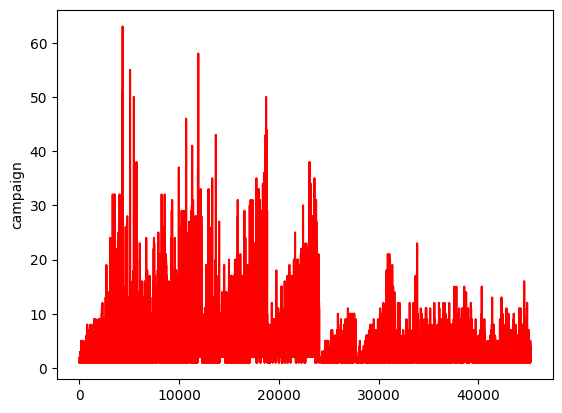

In [13]:
sns.lineplot(df['campaign'],color = 'red')

<Axes: xlabel='poutcome', ylabel='Count'>

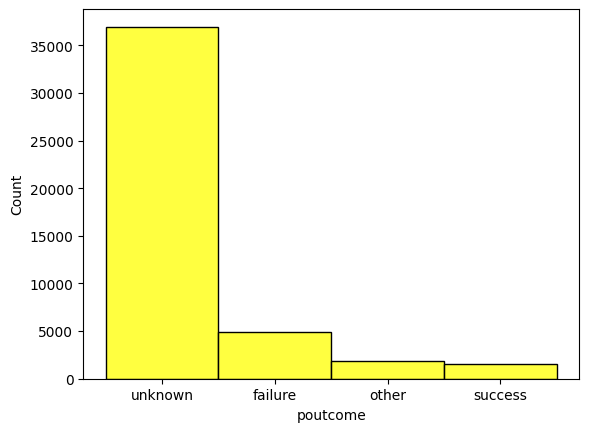

In [14]:
df.poutcome.value_counts()
sns.histplot(df['poutcome'],color = 'yellow')

In [15]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Data is imbalanced so we may balance it later to get good results.

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


<Axes: xlabel='contact', ylabel='Count'>

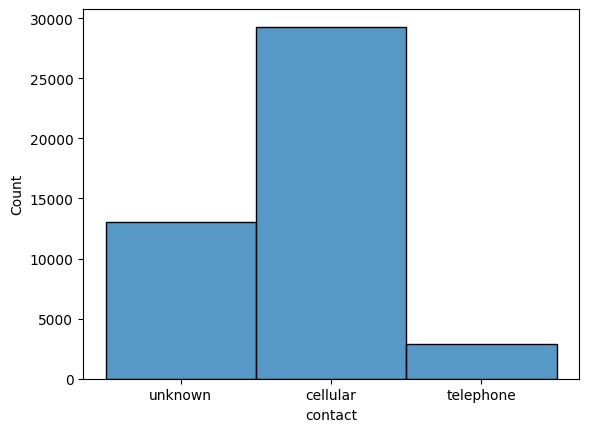

In [16]:
print(df['contact'].value_counts())
sns.histplot(df['contact'])

**BIVARIATE ANALYSIS**

<Axes: xlabel='education', ylabel='age'>

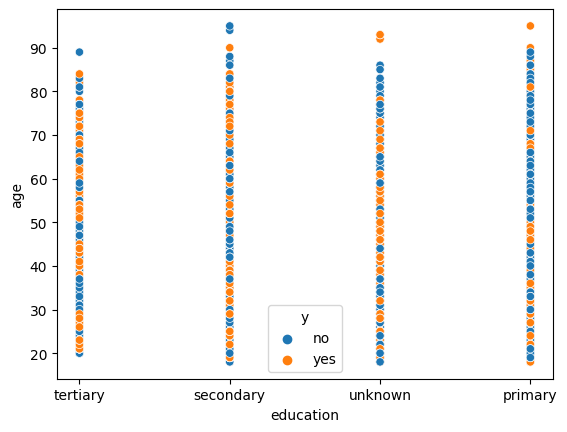

In [17]:
sns.scatterplot(data=df, y='age', x='education',hue='y')

observation:It has been observed that term deposit subscribed by customers of higher education is comparively higher than others.Moreover term deposit by primary educated
person is very less.so bank should also focussed on that sector person to get knowledge and benefits of term deposit.

In [18]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [19]:
df[(df['default'] == 'yes') & (df['loan']=='yes') & (df['housing'] == 'yes')][['default','housing','loan','education','contact']]

,default,housing,loan,education,contact
572,yes,yes,yes,primary,unknown
852,yes,yes,yes,tertiary,unknown
932,yes,yes,yes,secondary,unknown
1197,yes,yes,yes,primary,unknown
1653,yes,yes,yes,tertiary,unknown
...,...,...,...,...,...
37255,yes,yes,yes,secondary,cellular
38119,yes,yes,yes,tertiary,cellular
38244,yes,yes,yes,secondary,cellular
39290,yes,yes,yes,secondary,cellular


In [20]:
df[(df['default'] == 'yes') & (df['loan']=='yes') & (df['housing'] == 'yes') & (df['contact']=='unknown')][['default','housing','loan','education','contact']]

,default,housing,loan,education,contact
572,yes,yes,yes,primary,unknown
852,yes,yes,yes,tertiary,unknown
932,yes,yes,yes,secondary,unknown
1197,yes,yes,yes,primary,unknown
1653,yes,yes,yes,tertiary,unknown
1777,yes,yes,yes,secondary,unknown
1822,yes,yes,yes,secondary,unknown
1896,yes,yes,yes,tertiary,unknown
1993,yes,yes,yes,secondary,unknown
2113,yes,yes,yes,unknown,unknown


**Observation : Highly insightful data as these are the customers who has taken loan ,housing loan, and are defaulter also and has unknown number means the primary focus and investigation should be done.**

In [21]:
df[(df['default'] == 'yes') & (df['loan']=='yes') & (df['housing'] == 'yes') & (df['contact']=='unknown')].shape[0]

52

** Total 52 such customers exists which are defaulted in every sector**

In [22]:
df1 = df.groupby('contact')['balance'].sum().sort_values(ascending=False)
df1

contact
cellular     40938292
unknown      15409826
telephone     5241564
Name: balance, dtype: int64

Observation : Above values shows that the person having unknown phone number has huge amount of balance even more than the person having telephone.This is a check point.

In [23]:
df.pdays.value_counts().sort_values(ascending=False).head(20)

-1      36954
 182      167
 92       147
 91       126
 183      126
 181      117
 370       99
 184       85
 364       77
 95        74
 350       73
 94        72
 175       71
 185       68
 93        65
 343       65
 188       64
 189       60
 186       60
 174       57
Name: pdays, dtype: int64

Observation : The above data reveals that 167,(right hand side) customers has not been contacted since 182 days by any bank staff and following on'

In [24]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [25]:
df[(df['pdays'] > 300) & (df['default'] == 'yes')][['contact','balance','job','pdays','default']]

,contact,balance,job,pdays,default
31562,cellular,-60,blue-collar,332,yes
32824,cellular,-274,blue-collar,329,yes
32865,cellular,879,management,344,yes
34329,cellular,-148,blue-collar,357,yes
34415,cellular,-947,blue-collar,362,yes
34767,cellular,-1083,self-employed,336,yes
34856,cellular,-18,admin.,359,yes
34979,cellular,-92,technician,363,yes
35176,cellular,87,blue-collar,345,yes
35440,cellular,-1,management,349,yes


Observation : In the above analysis it is clearly visible that above customer has cellular phone and few are in high position also but defaulter and has phones but not contacted since one year.Bank has to look after this.

In [26]:
df['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

<Axes: >

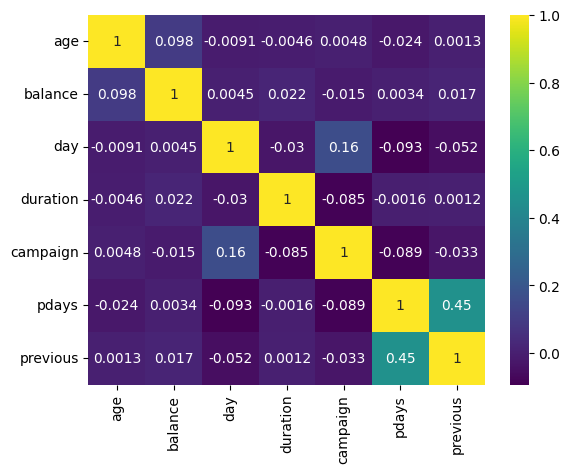

In [27]:
sns.heatmap(df.corr(),annot = True,cmap='viridis')

**CHECKING FOR OUTLIERS**

In [28]:
X = df.drop(columns = ['y'])
y = df['y']

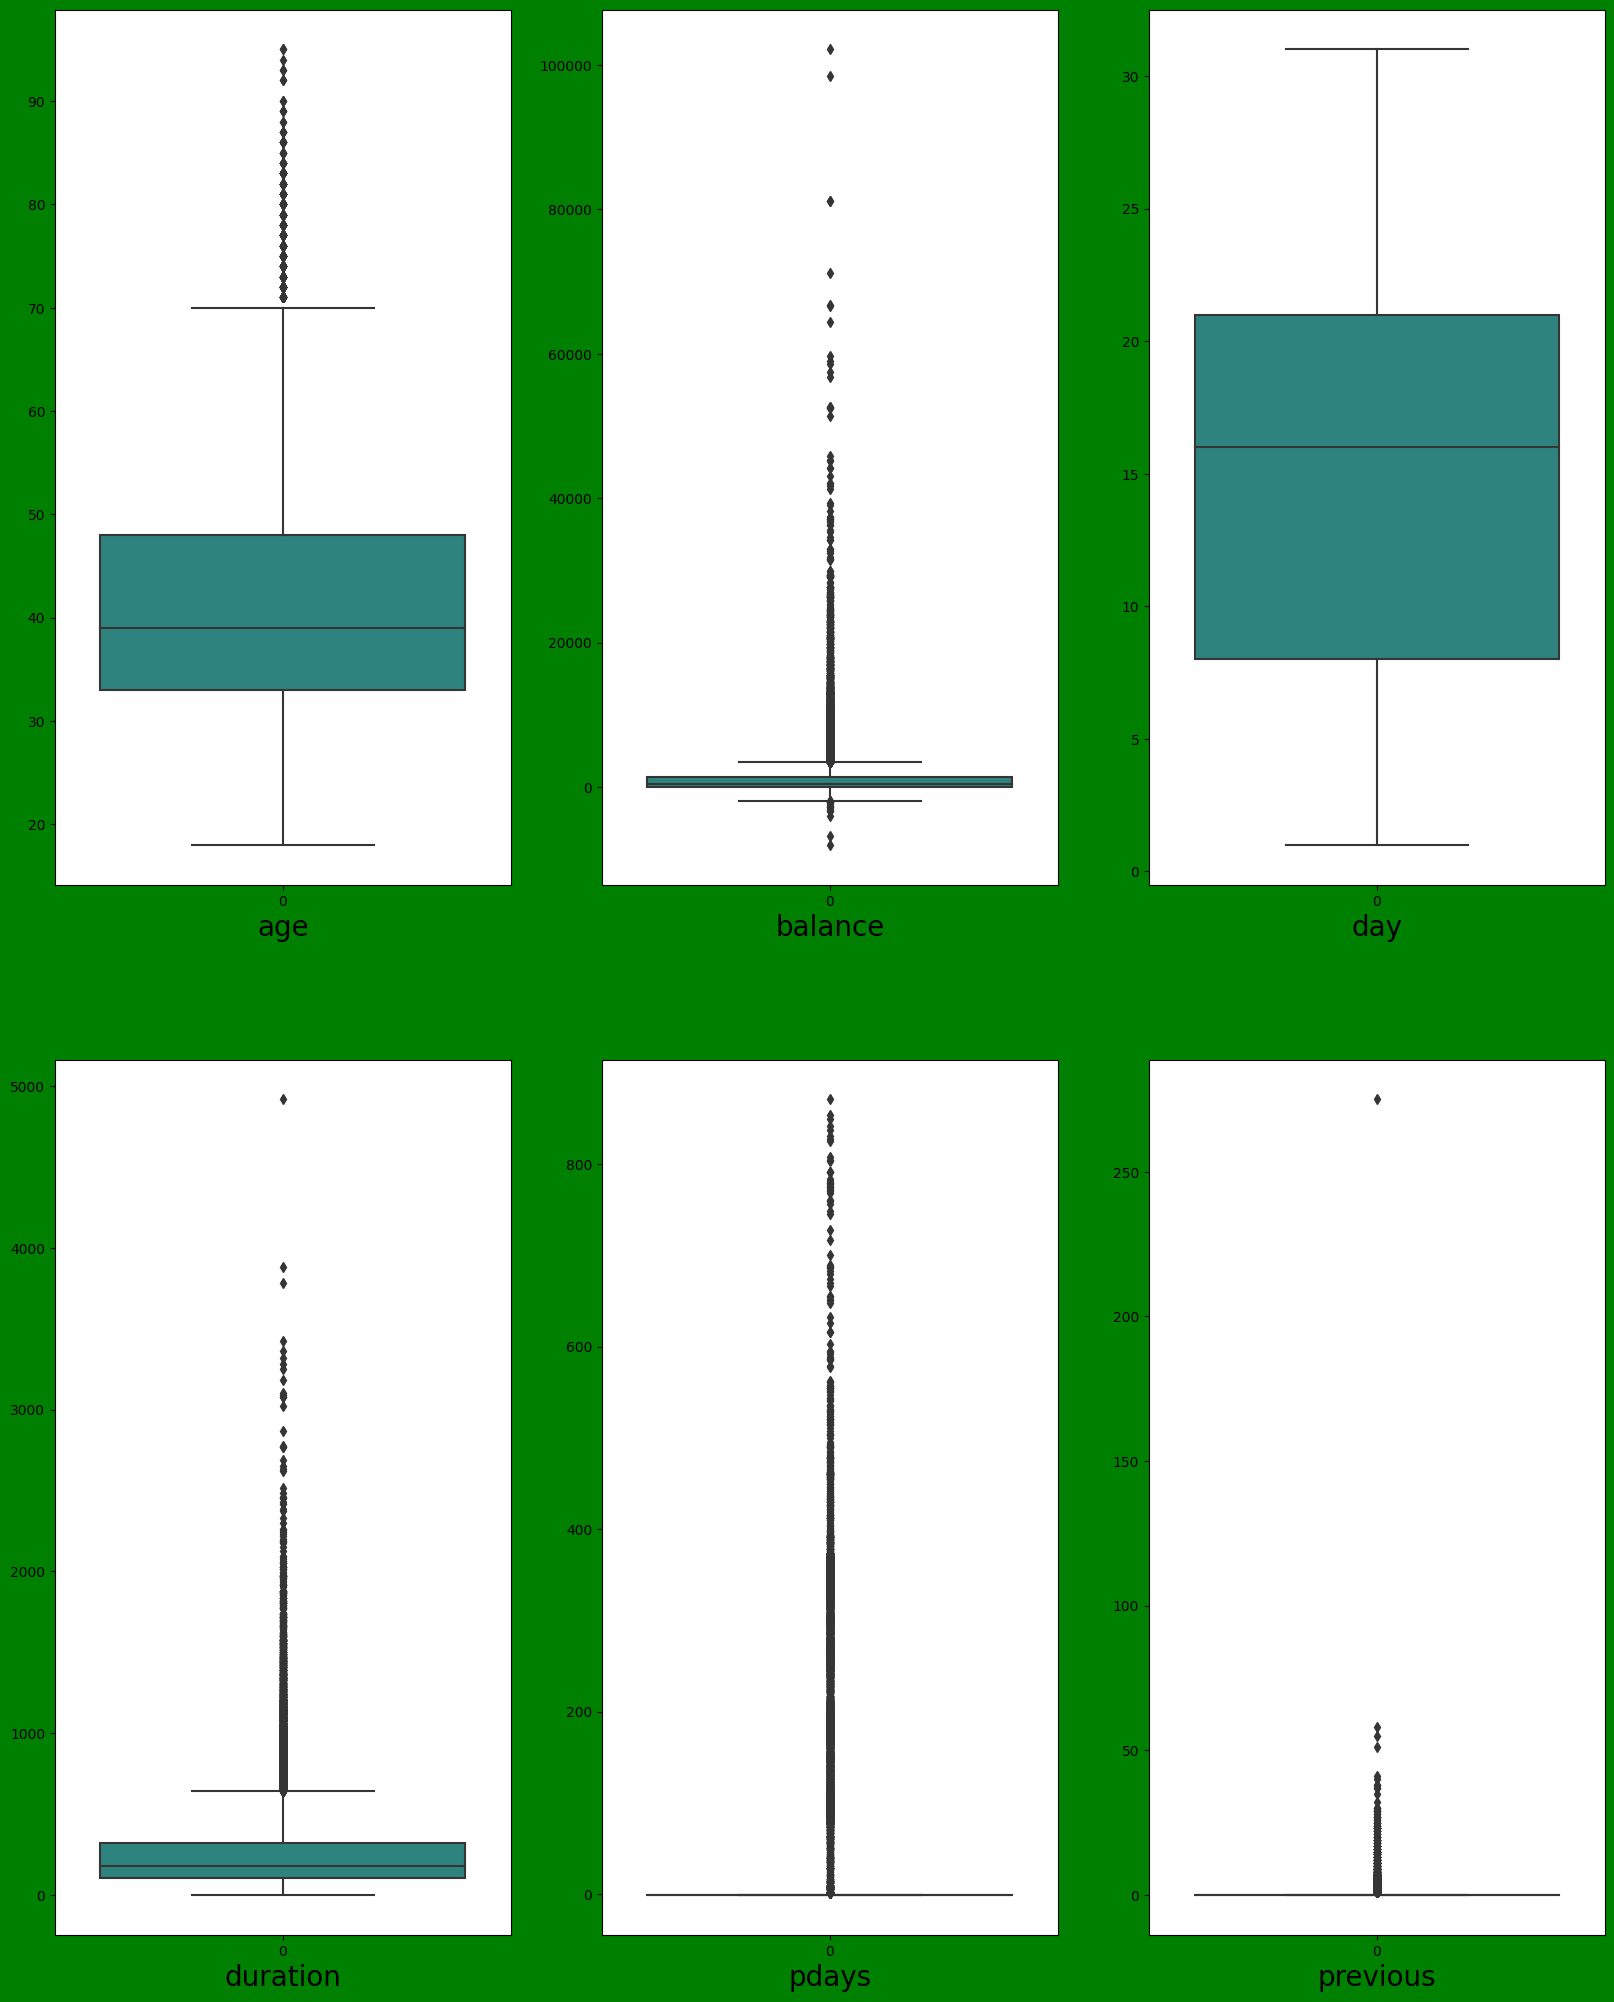

In [29]:
plt.figure(figsize=(20,25),facecolor='green')
plot_num=1
for col in X.drop(columns =  ['job', 'marital', 'education', 'default','housing',
       'loan', 'contact','month', 'campaign',
        'poutcome']):
    if plot_num<=8:
        plt.subplot(2,3,plot_num)
        sns.boxplot(X[col], palette='viridis')
        plt.xlabel(col,fontsize=20)
    plot_num+=1
plt.show()

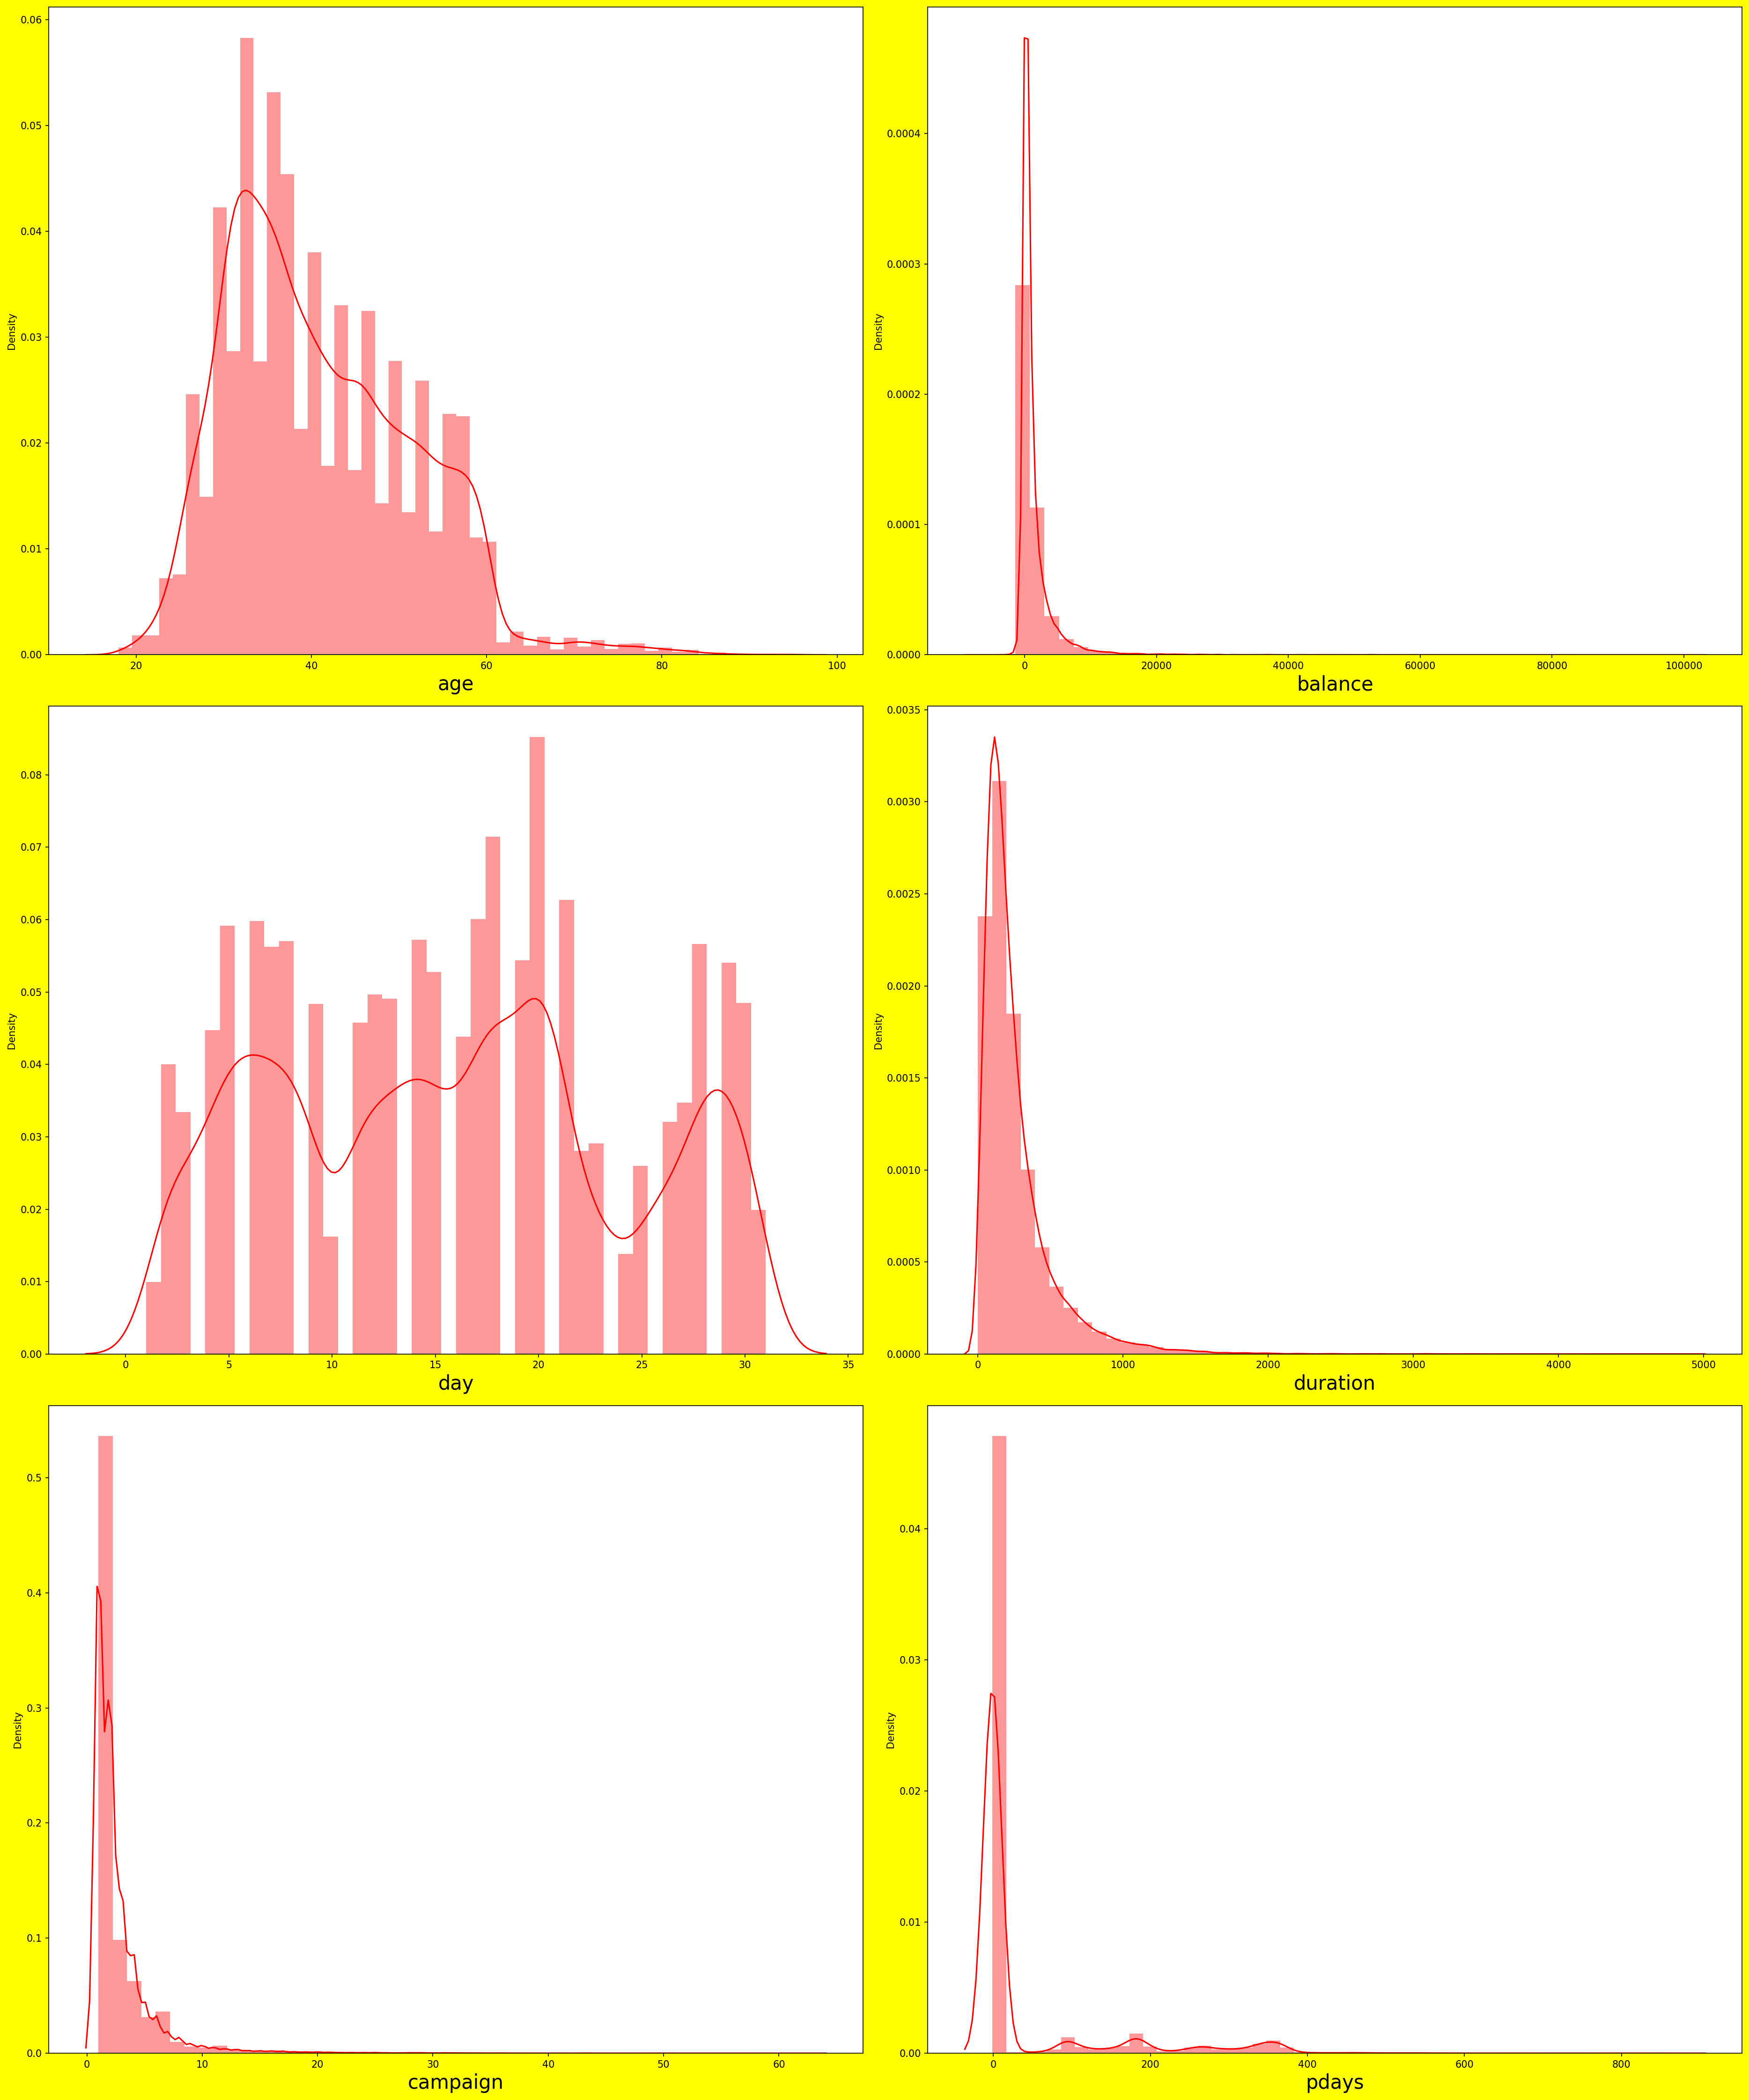

In [30]:
#Checking how data is distributed for every column.
plt.figure(figsize = (25,30),facecolor='yellow',dpi=150)

plotnumber = 1

for col in X.drop(columns =  ['job', 'marital', 'education', 'default','housing',
       'loan', 'contact','month',
        'poutcome']):
    if plotnumber <= 6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(X[col], color = 'r')
        plt.xlabel(col, fontsize = 20)

    plotnumber += 1

plt.tight_layout()

In [31]:
X.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [32]:
df2 =X.drop(columns =  ['job', 'marital', 'education', 'default','housing',
       'loan', 'contact','month',
        'poutcome']).copy()

In [33]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df[(z_score_abs < 3).all(axis=1)]

In [34]:
df3.shape

(40209, 17)

In [35]:
loss=(45211-40209)/45211 * 100
print('The loss  in after removing ouliers:',loss)

The loss  in after removing ouliers: 11.06367919311672


In [36]:
#DROPPING OUTLIERS
drop_value = X.index.difference(df3.index)

In [37]:
drop_value

Int64Index([   34,    37,    43,    59,    69,    83,    86,    87,   152,
              170,
            ...
            45171, 45172, 45177, 45188, 45191, 45199, 45200, 45204, 45208,
            45210],
           dtype='int64', length=5002)

In [38]:
df.drop(drop_value,inplace = True)

In [39]:
df.reset_index(drop=True,inplace = True)

In [40]:
df.shape

(40209, 17)

outliers has been removed from original dataset.

In [41]:
X = df.drop(columns = ['y'])
y = df['y']

In [42]:
X.skew()

age         0.437393
balance     2.443248
day         0.080460
duration    1.589047
campaign    2.069523
pdays       2.795853
previous    3.648407
dtype: float64

Skweness has been removed successfully.

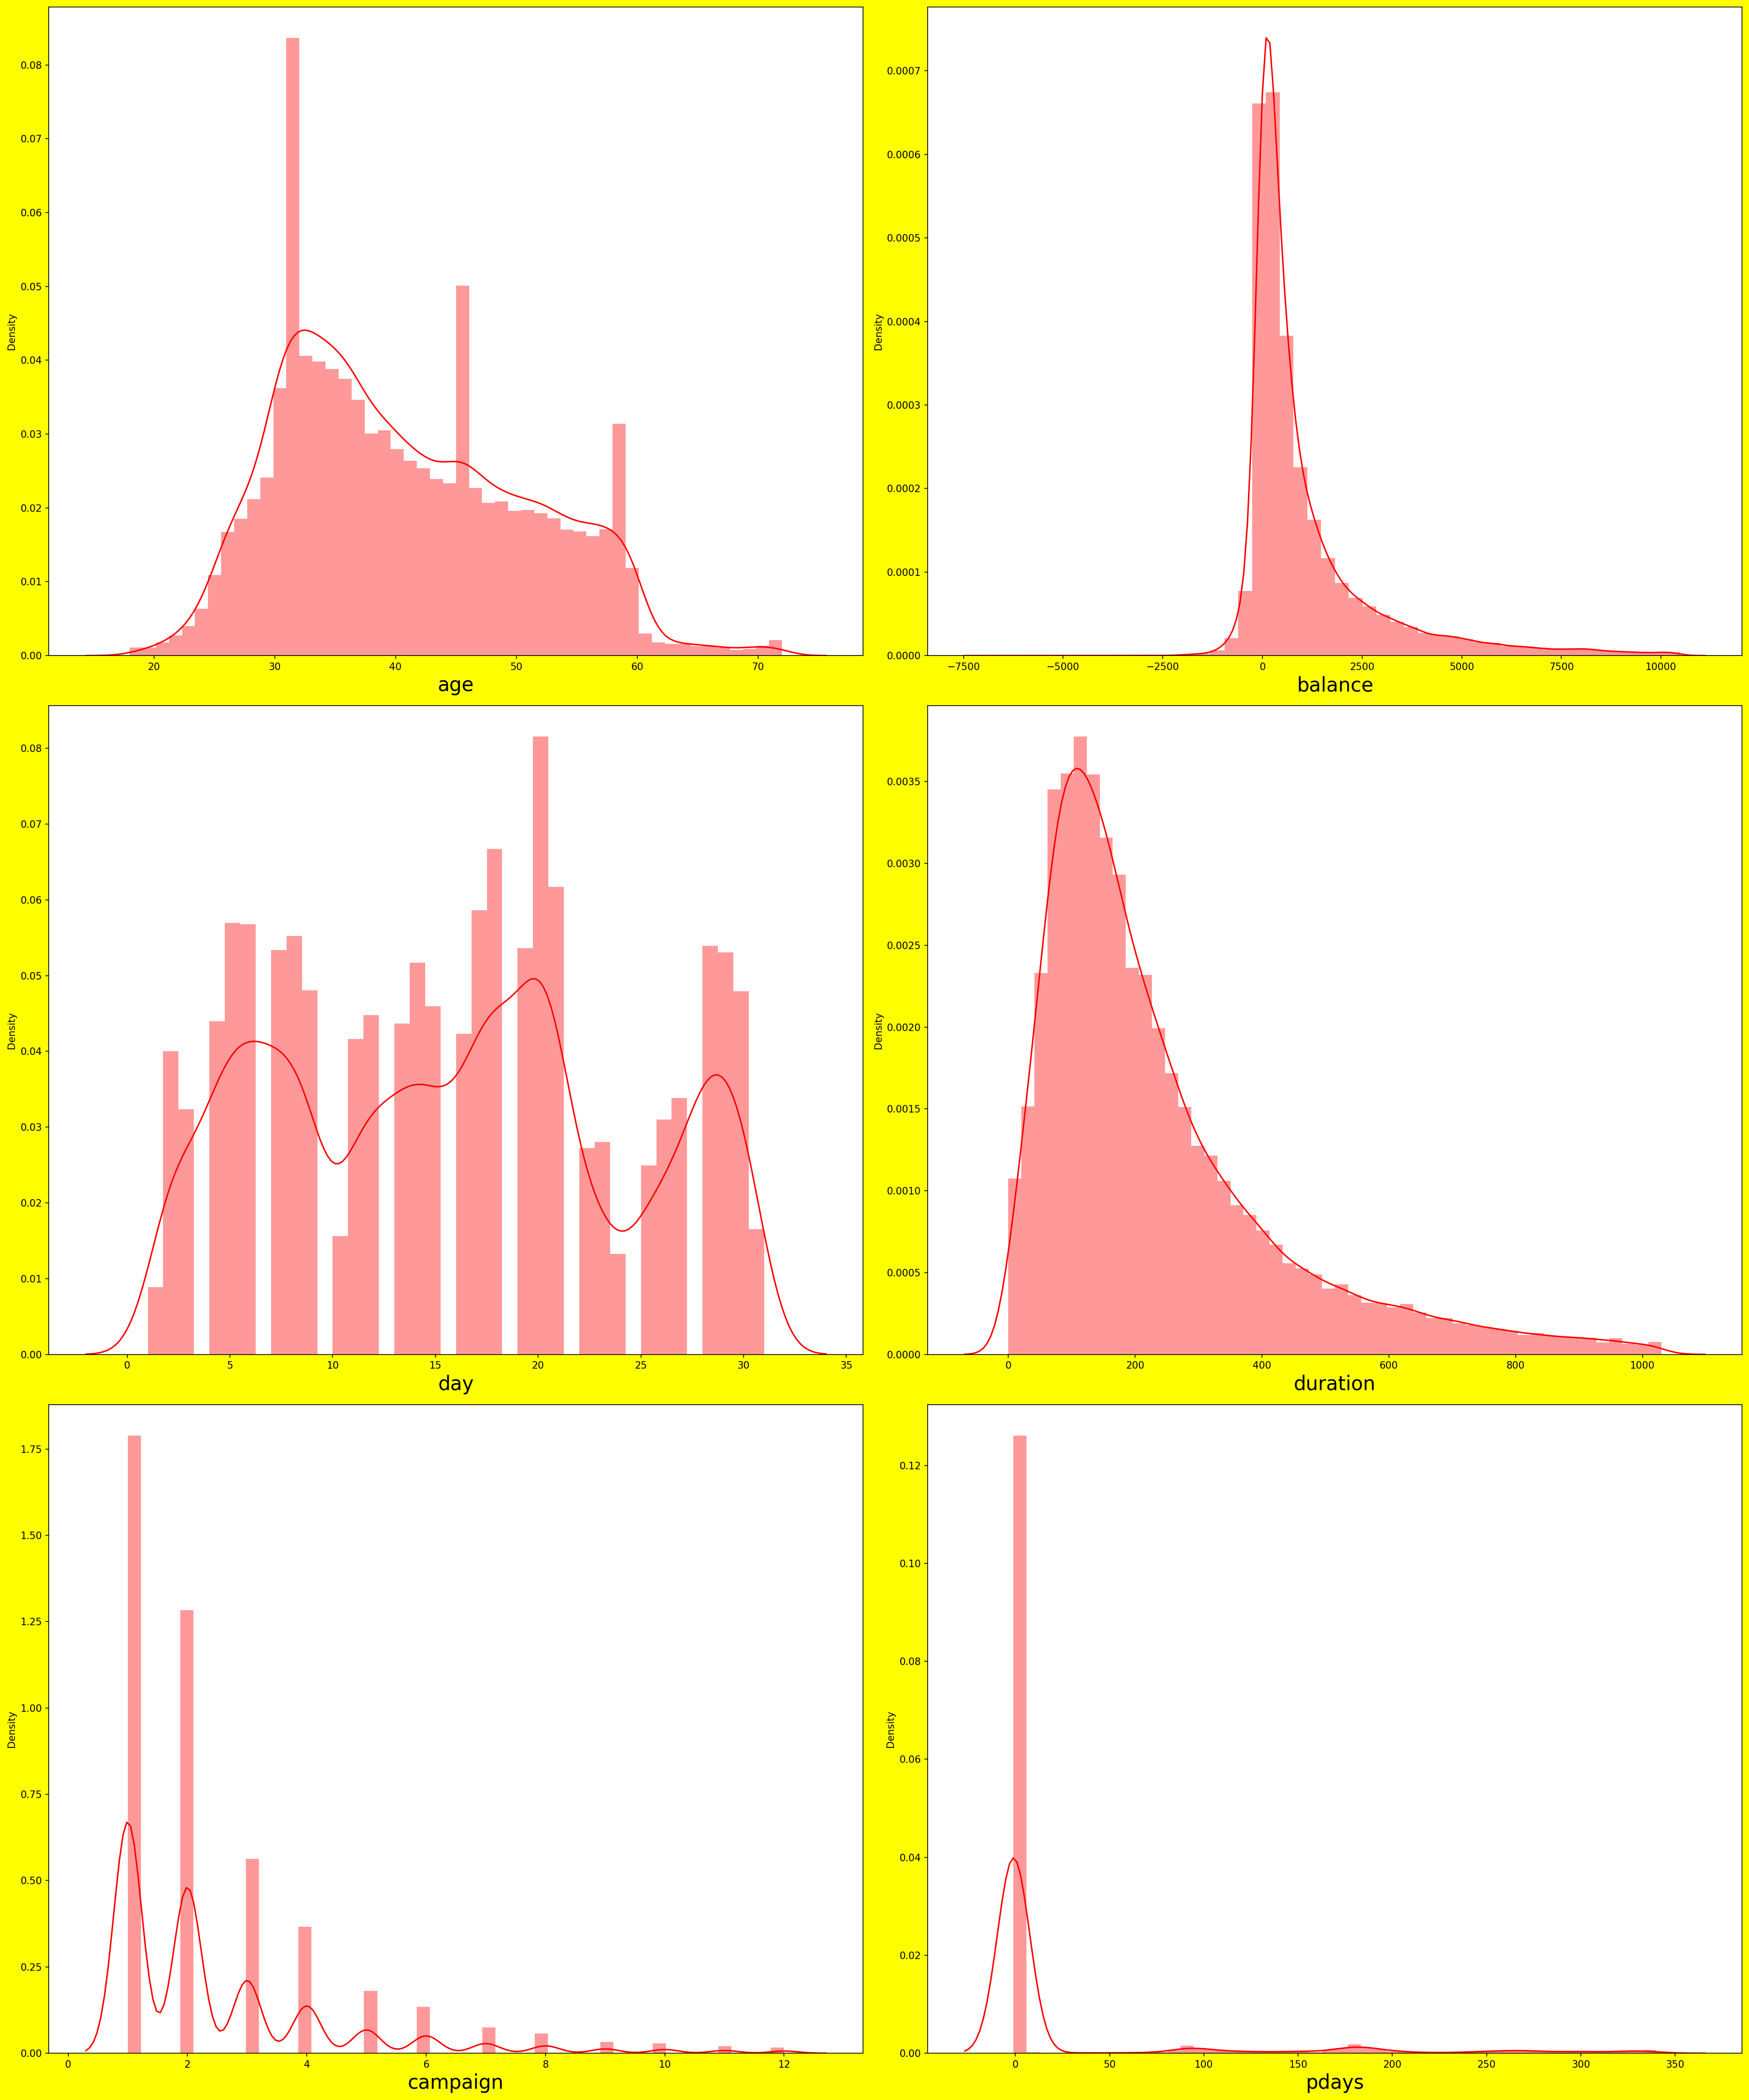

In [43]:
#Checking how data is distributed for every column.
plt.figure(figsize = (25,30),facecolor='yellow',dpi=150)

plotnumber = 1

for col in X.drop(columns =  ['job', 'marital', 'education', 'default','housing',
       'loan', 'contact','month',
        'poutcome']):
    if plotnumber <= 6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(X[col], color = 'r')
        plt.xlabel(col, fontsize = 20)

    plotnumber += 1

plt.tight_layout()

More or less graph also shows normal distribution.But some skweness observed so further applying to make it perfect.

In [44]:
from sklearn.preprocessing import PowerTransformer
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [45]:
df5 = X[['age', 'balance', 'day', 'duration','campaign','pdays']]
transformed= powtrans.fit_transform(df5)
transformed = pd.DataFrame(transformed, columns=df5.columns)
transformed.skew()


age        -0.000242
balance     0.292575
day        -0.163492
duration    0.003130
campaign    0.205736
pdays       2.058094
dtype: float64

In [46]:
transformed.index = X.index

In [47]:
X[['age', 'balance', 'day', 'duration','campaign','pdays']] = transformed

In [48]:
X.skew()

age        -0.000242
balance     0.292575
day        -0.163492
duration    0.003130
campaign    0.205736
pdays       2.058094
previous    3.648407
dtype: float64

ENCODING THE CATEGORICAL COLUMN

In [49]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [50]:
def deposit1(y):
    if(y=='yes'):
        return(1)
    elif(y=='no'):
        return(0)
df['term_deposit'] = df['y'].apply(deposit1)

In [51]:
df=df.drop(['y'],axis=1)

In [55]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [60]:
object = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month',  'poutcome']

In [61]:
#Import Label Encoder
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [62]:
#Tranforming object data using Label Encoder
for i in object:
    df[i] = lab_enc.fit_transform(df[i])

In [63]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [64]:
#Spliting dataset into X and Y
X = df.drop(columns = ['term_deposit'])
y = df['term_deposit']

# FEATURE SCALING USING STANDARD SCALER

In [103]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)
x=pd.DataFrame(x_scaled,columns=X.columns)
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.748659,-0.119192,-0.149455,1.214335,-0.106635,0.502084,1.310691,-0.327748,2.029737,-1.297985,0.953851,-0.273479,-0.661705,-0.472363,-0.434842,0.494907
1,0.372375,1.538456,1.525288,-0.237814,-0.106635,-0.671325,1.310691,-0.327748,2.029737,-1.297985,0.953851,-0.728843,-0.661705,-0.472363,-0.434842,0.494907
2,-0.708991,-0.782251,-0.149455,-0.237814,-0.106635,-0.686312,1.310691,3.051128,2.029737,-1.297985,0.953851,-1.039319,-0.661705,-0.472363,-0.434842,0.494907
3,0.667293,-1.113781,-0.149455,2.666484,-0.106635,0.148507,1.310691,-0.327748,2.029737,-1.297985,0.953851,-0.973084,-0.661705,-0.472363,-0.434842,0.494907
4,-0.708991,2.201515,1.525288,2.666484,-0.106635,-0.686867,-0.762956,-0.327748,2.029737,-1.297985,0.953851,-0.534279,-0.661705,-0.472363,-0.434842,0.494907


USING VIF TO CHECK MULTICOLLINEARITY

In [66]:
#Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif

,vif,features
0,1.243534,age
1,1.037502,job
2,1.217414,marital
3,1.060213,education
4,1.016303,default
5,1.054090,balance
6,1.207502,housing
7,1.048389,loan
8,1.333087,contact
9,1.021516,day


[0.09752002 0.06358582 0.03083652 0.04021535 0.00327073 0.09356086
 0.02842311 0.01280583 0.02709315 0.09734065 0.10355443 0.22894218
 0.05601202 0.03328863 0.03095665 0.05259405]


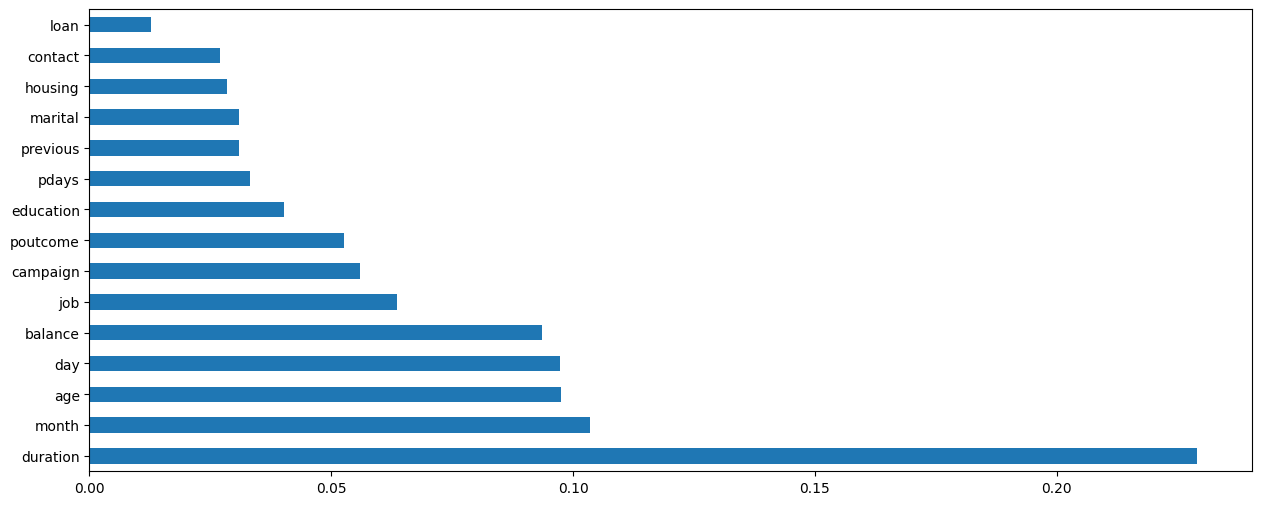

In [68]:
from sklearn.ensemble import ExtraTreesClassifier
selection=ExtraTreesClassifier()
selection.fit(x,y)
##use inbuilt class feature_importances of tree based classifiers
print(selection.feature_importances_)
# for plotting
plt.figure(figsize=(15,6))
feat_importances=pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show();

**Checking For imbalance in data**

In [71]:
y.value_counts()

0    36155
1     4054
Name: term_deposit, dtype: int64

In [80]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x, y = sm.fit_resample(x,y)

In [81]:
y.value_counts()

0    36155
1    36155
Name: term_deposit, dtype: int64

Target variable has been balanced.

# **APPLYING MACHINE LEARNING MODEL**

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, train_test_split

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=10,stratify=y)

In [95]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(40,100):
         x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i,stratify=y)
         clf.fit(x_train,y_train)
         pred=clf.predict(x_test)
         accuracy_check=accuracy_score(y_test,pred)
         if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('\n')
    print('F1 score',f1_score(y_test,pred)*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred)*100)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

## **1.LOGISTIC REGRESSION**

max accuracy score corresponding to 91 is 81.53782326095975


cross validation score 76.9893514036786


Standard Deviation 4.11432545803026


F1 score 80.01391788448156


Training accuracy 79.94917715392062


Test Accuracy 80.1410593278938


Confusion Matrix [[5841 1390]
 [1482 5749]]


Classification Report               precision    recall  f1-score   support

           0       0.80      0.81      0.80      7231
           1       0.81      0.80      0.80      7231

    accuracy                           0.80     14462
   macro avg       0.80      0.80      0.80     14462
weighted avg       0.80      0.80      0.80     14462



Roc_auc Score 80.1410593278938





91

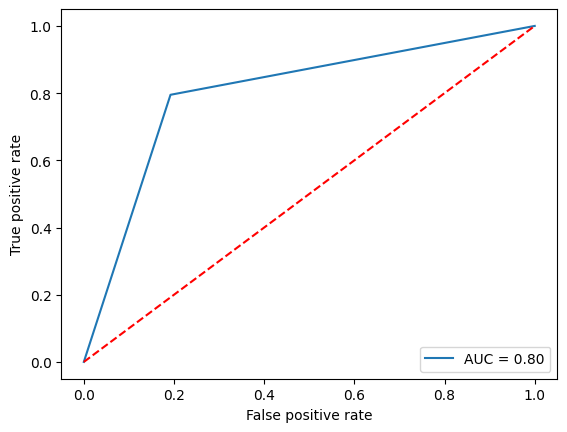

In [84]:
lr=LogisticRegression()
max_accuracy_score(lr,x,y)

# **RANDOM FOREST MODEL**

max accuracy score corresponding to 77 is 94.212418752593


cross validation score 79.7427741667819


Standard Deviation 5.904404197130943


F1 score 93.78515757370384


Training accuracy 100.0


Test Accuracy 93.65924491771538


Confusion Matrix [[6626  605]
 [ 312 6919]]


Classification Report               precision    recall  f1-score   support

           0       0.96      0.92      0.94      7231
           1       0.92      0.96      0.94      7231

    accuracy                           0.94     14462
   macro avg       0.94      0.94      0.94     14462
weighted avg       0.94      0.94      0.94     14462



Roc_auc Score 93.65924491771538





77

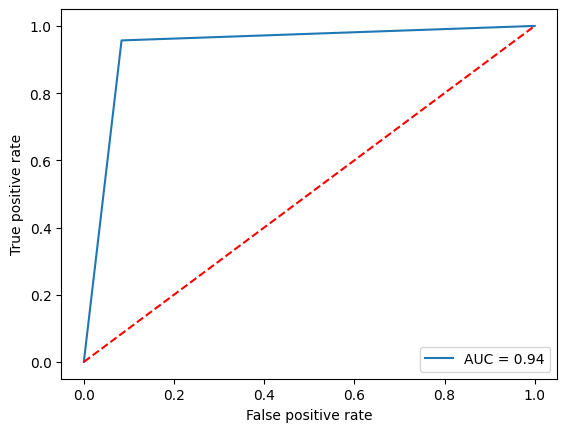

In [85]:
rf=RandomForestClassifier()
max_accuracy_score(rf,x,y)

#**KNN MODEL**

max accuracy score corresponding to 71 is 87.65730880929333


cross validation score 85.96874567832943


Standard Deviation 2.4540266795924564


F1 score 88.11083123425692


Training accuracy 90.65136219056839


Test Accuracy 86.94509749688841


Confusion Matrix [[5578 1653]
 [ 235 6996]]


Classification Report               precision    recall  f1-score   support

           0       0.96      0.77      0.86      7231
           1       0.81      0.97      0.88      7231

    accuracy                           0.87     14462
   macro avg       0.88      0.87      0.87     14462
weighted avg       0.88      0.87      0.87     14462



Roc_auc Score 86.9450974968884





71

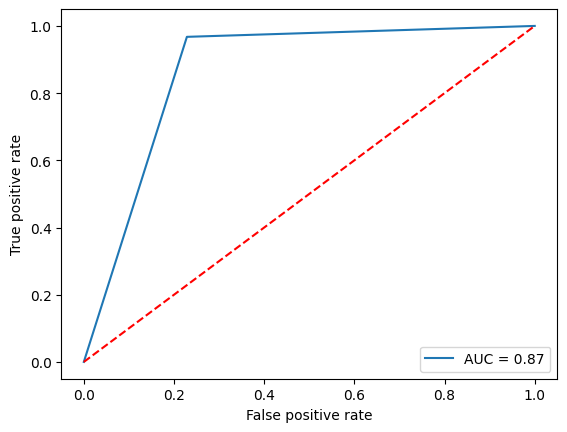

In [86]:
knn=KNeighborsClassifier()
max_accuracy_score(knn,x,y)

# ADA BOOSTING MODEL

max accuracy score corresponding to 77 is 88.84663255428018


cross validation score 79.1411976213525


Standard Deviation 4.992961941575002


F1 score 88.43296298820803


Training accuracy 88.29518738763656


Test Accuracy 88.26580002765868


Confusion Matrix [[6278  953]
 [ 744 6487]]


Classification Report               precision    recall  f1-score   support

           0       0.89      0.87      0.88      7231
           1       0.87      0.90      0.88      7231

    accuracy                           0.88     14462
   macro avg       0.88      0.88      0.88     14462
weighted avg       0.88      0.88      0.88     14462



Roc_auc Score 88.26580002765868





77

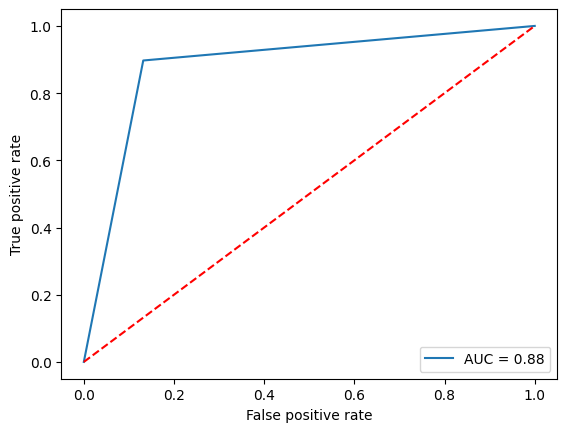

In [87]:
Adb=AdaBoostClassifier()
max_accuracy_score(Adb,x,y)

## GRADIENT BOOSTING MODEL

max accuracy score corresponding to 81 is 90.17424975798644


cross validation score 78.3543078412391


Standard Deviation 4.882866881837308


F1 score 89.89810378568056


Training accuracy 89.63144793251278


Test Accuracy 89.64873461485271


Confusion Matrix [[6304  927]
 [ 570 6661]]


Classification Report               precision    recall  f1-score   support

           0       0.92      0.87      0.89      7231
           1       0.88      0.92      0.90      7231

    accuracy                           0.90     14462
   macro avg       0.90      0.90      0.90     14462
weighted avg       0.90      0.90      0.90     14462



Roc_auc Score 89.64873461485273





81

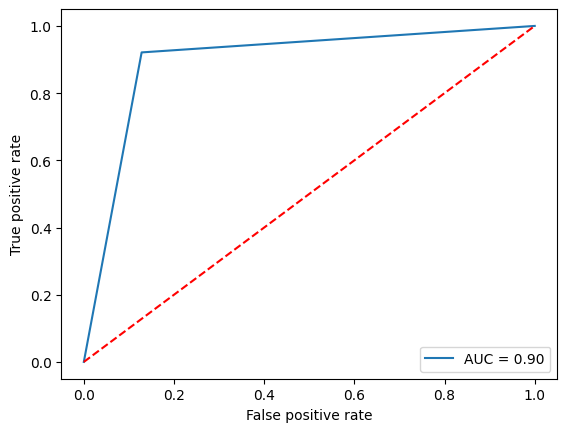

In [88]:
gb=GradientBoostingClassifier()
max_accuracy_score(gb,x,y)

# **HYPERTUNING THE RANDOM FOREST MODEL**

In [105]:
#Let's tune the parameters using GridSearchCV
params = {
    'n_estimators':[13,15,17],
    'criterion':['gini','entropy'],
    'max_depth':[10,15],
    'min_samples_leaf':[5,6],
    'min_samples_split':[10,11],
}
grd = GridSearchCV(rf, param_grid = params)
grd.fit(x_train,y_train)

print('best_params=>', grd.best_params_)

best_params=> {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 17}


In [106]:
RFR_model = grd.best_estimator_
RFR_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=11,
                       n_estimators=17)

In [107]:
#Model Confidence/Accuracy
print('Accuracy_Score of  Random Forest Model is', accuracy_score(y_test,RFR_model.predict(x_test))*100)
print("Cross Validation accuracy score of Random Forest model is ",cross_val_score(RFR_model, x, y, cv = 5, scoring = 'accuracy').mean() *100)

Accuracy_Score of  Random Forest Model is 91.52261098050062
Cross Validation accuracy score of Random Forest model is  78.2851611118794


In [120]:
#Saving the best model to the local file system

import pickle
filename = 'finalized_model.pickle'
pickle.dump(RFR_model, open('BANK_model', 'wb'))

In [121]:
#Loading saved model
loaded_model = pickle.load(open('BANK_model','rb'))

In [122]:
Banking_model = loaded_model.predict(x_test)
Banking_model


array([1, 1, 0, ..., 0, 0, 1])

In [127]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
term_deposit = pd.DataFrame({'Actual term_deposit': y_test, 'Predicted term_deposit': Banking_model})
term_deposit.head()

,Actual term_deposit,Predicted term_deposit
52234,1,1
47050,1,1
28909,0,0
11570,0,0
8803,0,0


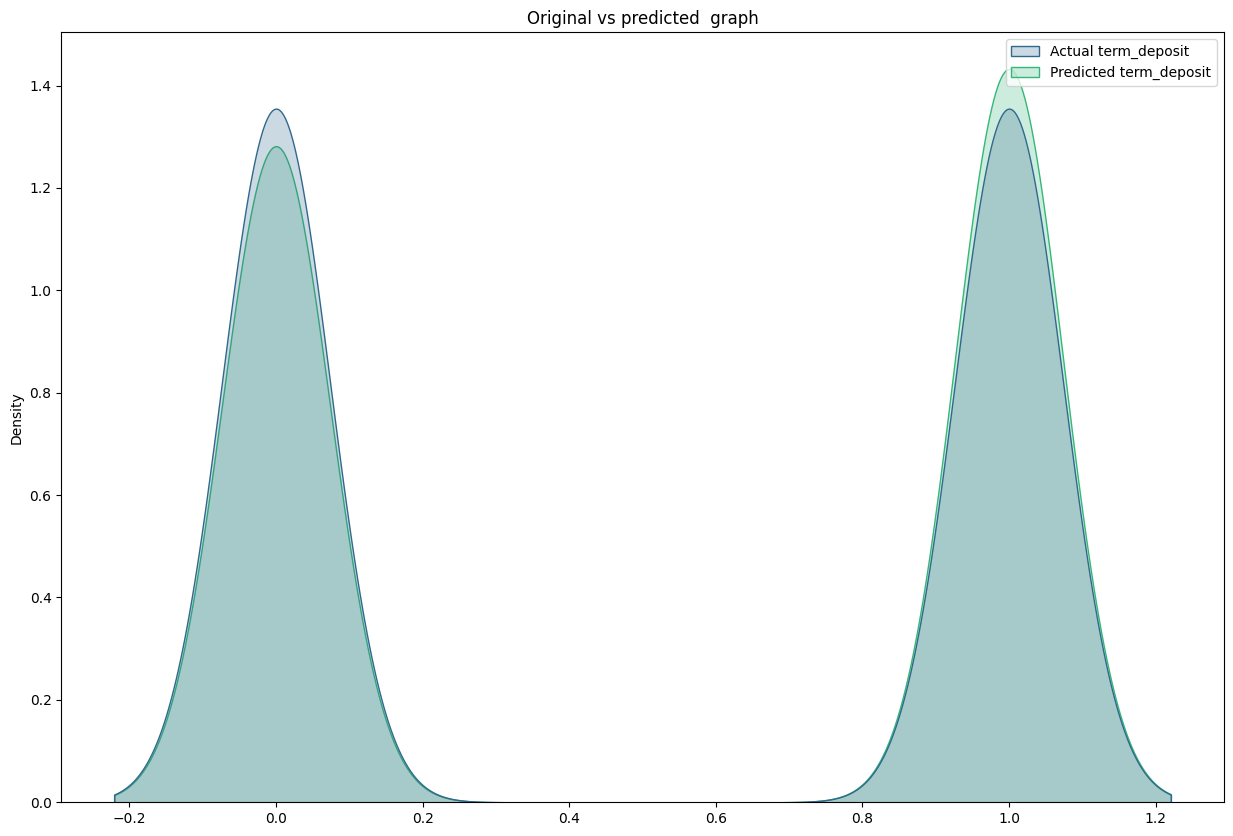

In [124]:
#Visulizing actual vs Predicted
plt.figure(figsize = (15,10))
sns.kdeplot(data = term_deposit, palette = 'viridis', gridsize = 900, shade = True)
plt.title('Original vs predicted  graph')
plt.show()

# --------ACTUAL AND PREDICTED RESULTS ARE WORKING WELL-----------
# -------=PROJECT FINISHED ---------------------------------------